<a href="https://colab.research.google.com/github/melhamdani/-Stamp-Prices/blob/main/Project_1_To_Do_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project_1



Deep Dive Coding Data Science Bootcamp Project

#**Problem Definition**

The project considers analyzing the data from Train.csv for cleaning and getting insights by using in-class tools. The important Python libraries that will be utilized in the process to manipulate, clean, or visualize data include Pandas, NumPy, and Matplotlib. We also give recommendations based on the data against any issues while dealing with cleaning.

# Data Collection





##*Data Overview*

##*Imports*

In [62]:
24
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#*File bold text Paths*

##Load

In [63]:
import pandas as pd

url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'

df = pd.read_csv(url)
df.head()



,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


# Data Cleaning

4. Examine the data using tools we have used in class.

1. If there are data cleaning issues, develop recommendations for how to deal with them.



In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [65]:
df.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [66]:
df.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [67]:

df.describe()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,89999.500000,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,51961.668564,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,44999.750000,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,89999.500000,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,134999.250000,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,179999.000000,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


In [68]:
df = df.drop(columns=['Unnamed: 0'])


In [69]:

missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)


Missing values in each column:
 ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
dtype: int64


In [70]:

df.isnull().sum().sum()
# missing_values = df.isnull().sum().sum
# print("Missing values in each column:\n", missing_values)

0

# Exploratory Data Analysis







In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

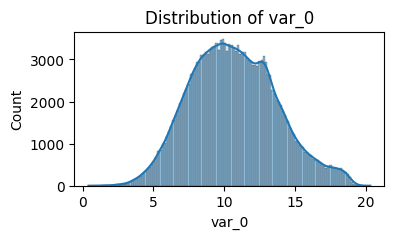

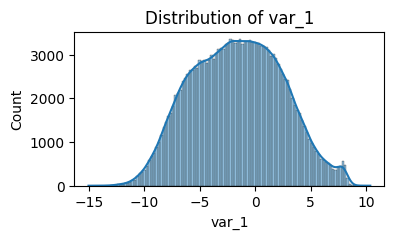

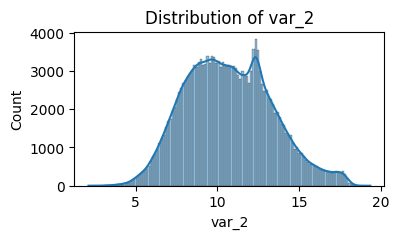

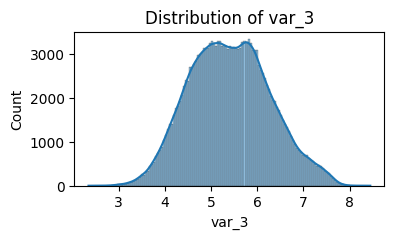

In [72]:

for var in ['var_0', 'var_1', 'var_2', 'var_3']:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()


## target value

In [73]:

print(df['target'].unique())

print(df['target'].value_counts())


[0 1]
target
0    161960
1     18040
Name: count, dtype: int64


In [74]:

print(df['target'].unique())

df['target'].value_counts()


[0 1]


,count
target,
0,161960
1,18040


In [75]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

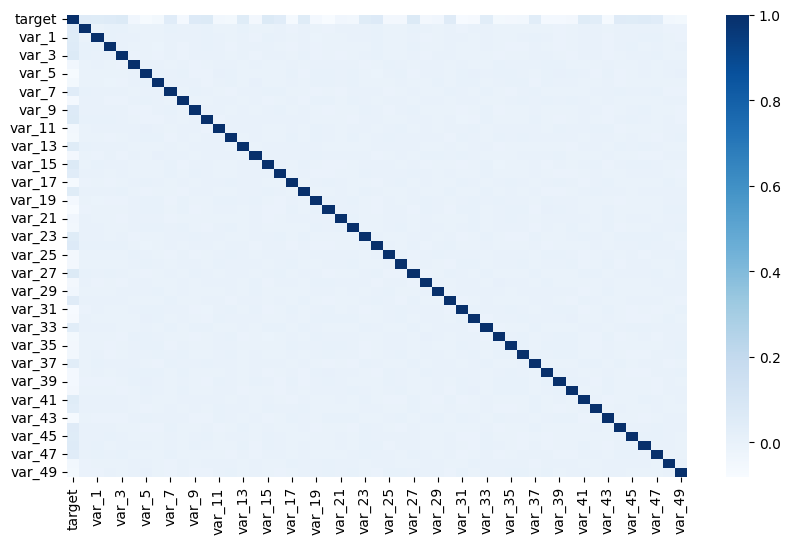

In [76]:

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues', annot=False)
plt.show()


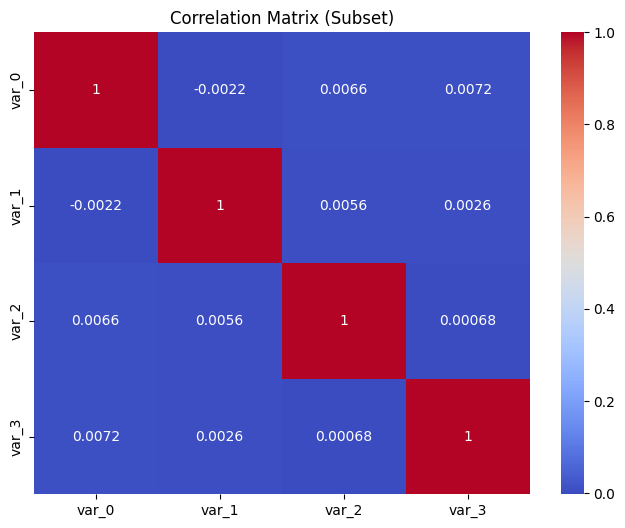

In [77]:
selected_columns = ['var_0', 'var_1', 'var_2', 'var_3']
corr_matrix_subset = numeric_df[selected_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Subset)')
plt.show()

In [78]:

successful_transactions = df[df['target'] == 1].copy()

unsuccessful_transactions = df[df['target'] == 0].copy()

print(successful_transactions.head())
print(unsuccessful_transactions.head())


     ID_code  target    var_0   var_1    var_2   var_3   var_4    var_5  \
13  train_13       1  16.3699  1.5934  16.7395  4.8222  8.6978  13.7999   
29  train_29       1   5.3301 -2.6064  13.1913  5.9064  9.1168  14.0957   
63  train_63       1   7.7072  0.0183   9.9974  6.0425  6.6710  14.0503   
65  train_65       1  10.5358 -2.5439   8.7394  5.1584  9.0358  13.6021   
71  train_71       1   6.7547  2.5973  14.2141  4.2336  9.1282  13.9394   

      var_6    var_7  ...  var_40   var_41  var_42   var_43  var_44   var_45  \
13   2.7925  14.3984  ...  5.6656   3.5750 -2.2723  15.7383  8.5618  11.8982   
29  12.3335   1.6610  ...  5.4183   8.6643  4.1428   4.7056  4.3694  16.4554   
63   9.0144  -2.3445  ...  6.0669   2.5841  2.2445  23.1283  2.9384  27.6213   
65   4.2864  13.8723  ...  6.1149   2.2550 -7.2104  19.7545  6.3190  11.9410   
71   3.6480  24.2658  ...  5.0565  11.9429  0.3140  20.4828  7.9488  11.2587   

    var_46  var_47  var_48   var_49  
13  7.4002  7.4031  4.3989  15

In [79]:

successful_df = df[df['target'] == 1].copy()
unsuccessful_df = df[df['target'] == 0].copy()

print("Shape of successful transactions:", successful_df.shape)
print("Shape of unsuccessful transactions:", unsuccessful_df.shape)


Shape of successful transactions: (18040, 52)
Shape of unsuccessful transactions: (161960, 52)


In [80]:

successful_df = df[df['target'] == 1].copy()              # Create a DataFrame for successful transactions (target = 1)


unsuccessful_df = df[df['target'] == 0].copy()            # Create a DataFrame for unsuccessful transactions (target = 0)

print("Successful transactions shape:", successful_df.shape)
print("Unsuccessful transactions shape:", unsuccessful_df.shape)


Successful transactions shape: (18040, 52)
Unsuccessful transactions shape: (161960, 52)


In [81]:

predictors_df = numeric_df.drop(columns=['target'])# Create a dataframe for the predictors

target_df = df['target']                          # Create a dataframe for the target variable

print("Predictors shape: ", predictors_df.shape)
print("Target shape: ", target_df.shape)

Predictors shape:  (180000, 50)
Target shape:  (180000,)


In [82]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target', 'ID_code'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9089
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32349
           1       0.66      0.21      0.32      3651

    accuracy                           0.91     36000
   macro avg       0.79      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000



In [84]:

import numpy as np


numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.fillna(0)  # Replace NaN values with 0


In [85]:
# df.drop(“Unnamed: 0”, axis = 1, inplace = True) # Dropping our Columns labeling each training set with no additional information
# df.drop(“ID_code”, axis = 1, inplace = True)

In [86]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.fillna(0)

In [87]:
corr = numeric_df.drop(columns=['target']).corr()

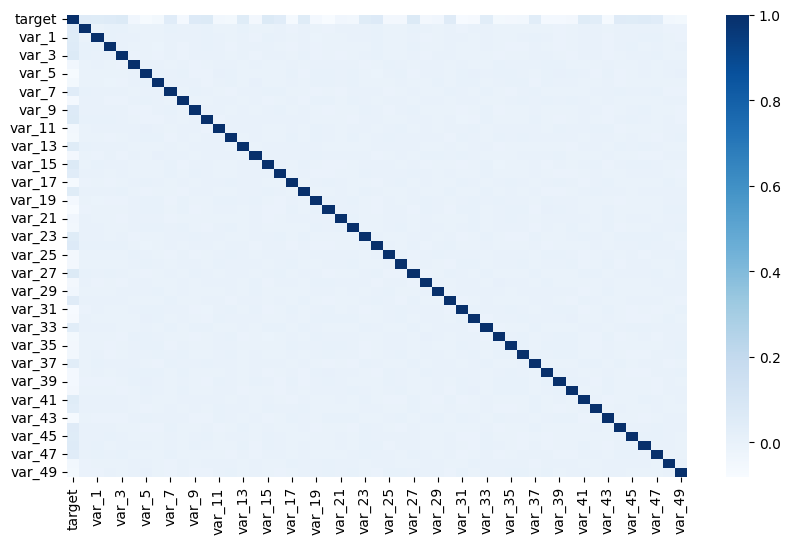

In [88]:
corr =numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues',annot = False);

## Data Processing





##Gaussian Naive Bayes Model

In [89]:
# solution 10
if 'Unnamed: 0' in df.columns:
    X = df.drop(columns=['Unnamed: 0', 'ID_code', 'target'])
else:
    X = df.drop(columns=['ID_code', 'target'])

y = df['target']

print("Shape of predictor variables (X):", X.shape)
print("Shape of target variable (y):", y.shape)


Shape of predictor variables (X): (180000, 50)
Shape of target variable (y): (180000,)


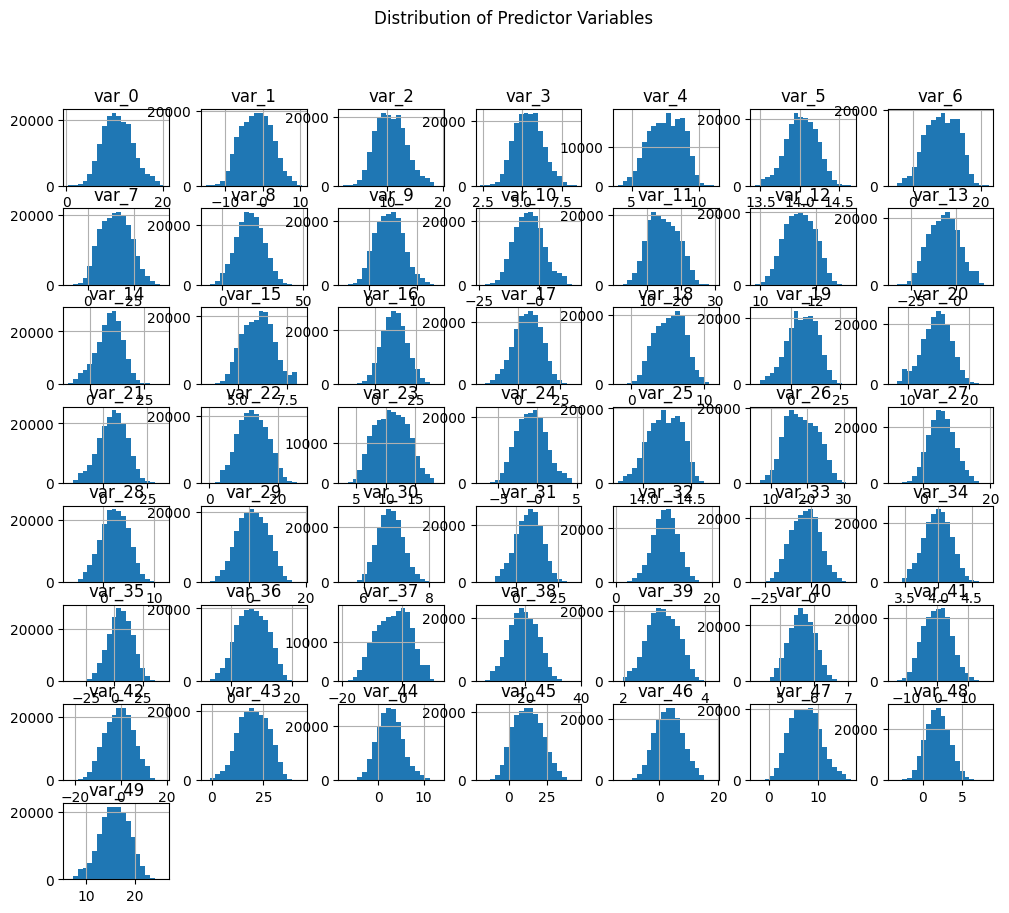

In [90]:

X.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Predictor Variables')
plt.show()


In [91]:
#solution 11
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()


model.fit(X, y)

print("Model training completed successfully!")



Model training completed successfully!


In [92]:
# solution 12
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets (80% train, 20% test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (144000, 50)
Shape of X_test: (36000, 50)
Shape of y_train: (144000,)
Shape of y_test: (36000,)


In [93]:
# metho1
from sklearn.model_selection import train_test_split

X = numeric_df.drop(columns=['target'])         # Drop the target column from predictors
y = numeric_df['target']                        # The target column

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (144000, 50)
Testing data shape: (36000, 50)



##Gaussian Naive Bayes Model

In [94]:

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()


gnb.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [95]:

model.fit(X_train, y_train)

print("Model training on training data completed successfully!")


Model training on training data completed successfully!


In [96]:
# solution 14
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model on the test data: {accuracy:.4f}")


Accuracy of the model on the test data: 0.9089


##Cross-Validation

In [97]:
# solution 15
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

cv_scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.9121875  0.91131944 0.91159722 0.91090278 0.9128125 ]
Mean cross-validation accuracy: 0.9118


In [98]:
# 2
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())



Cross-validation accuracy scores: [0.9121875  0.91131944 0.91159722 0.91090278 0.9128125 ]
Mean cross-validation accuracy: 0.9117638888888889


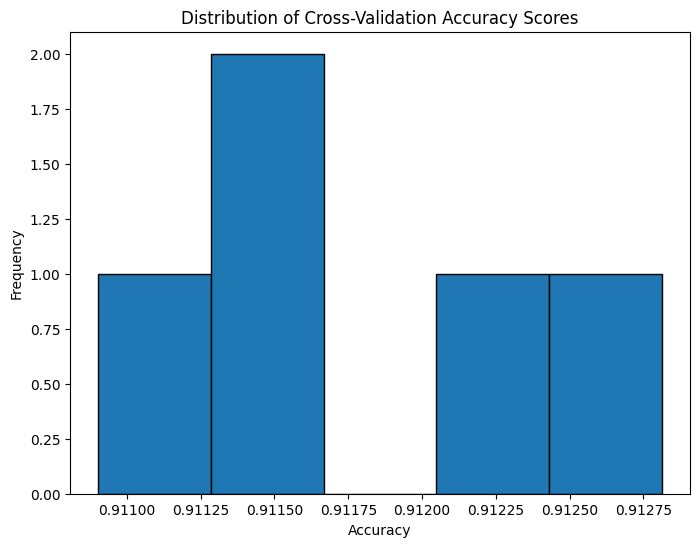

In [99]:
# solution 16
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, edgecolor='black')
plt.title('Distribution of Cross-Validation Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()



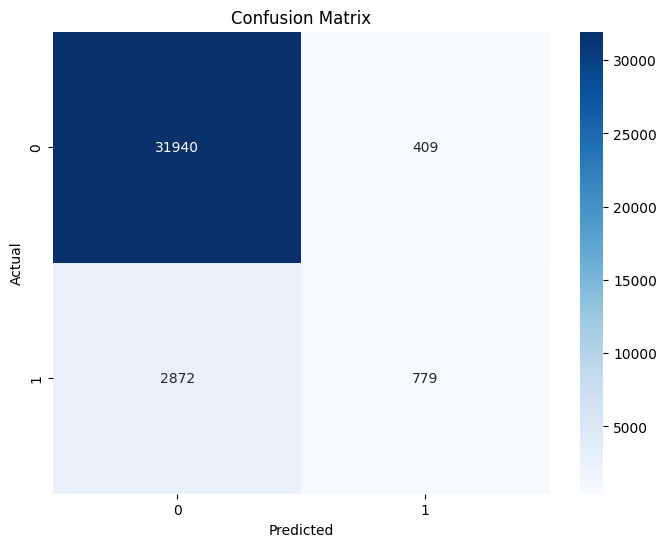

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32349
           1       0.66      0.21      0.32      3651

    accuracy                           0.91     36000
   macro avg       0.79      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000



In [100]:
# solution 18
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


In [101]:
#19
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

gnb_balanced = GaussianNB()
gnb_balanced.fit(X_balanced, y_balanced)

y_pred = gnb_balanced.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[25433  6916]
 [ 1927  1724]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85     32349
           1       0.20      0.47      0.28      3651

    accuracy                           0.75     36000
   macro avg       0.56      0.63      0.57     36000
weighted avg       0.86      0.75      0.79     36000



In [102]:

cv_scores_balanced = cross_val_score(gnb_balanced, X_balanced, y_balanced, cv=5, scoring='accuracy')


print("Cross-validation accuracy scores on the balanced dataset:", cv_scores_balanced)

print(f"Mean cross-validation accuracy on the balanced dataset: {cv_scores_balanced.mean():.4f}")


Cross-validation accuracy scores on the balanced dataset: [0.69599769 0.80237246 0.80597562 0.80088342 0.80383458]
Mean cross-validation accuracy on the balanced dataset: 0.7818


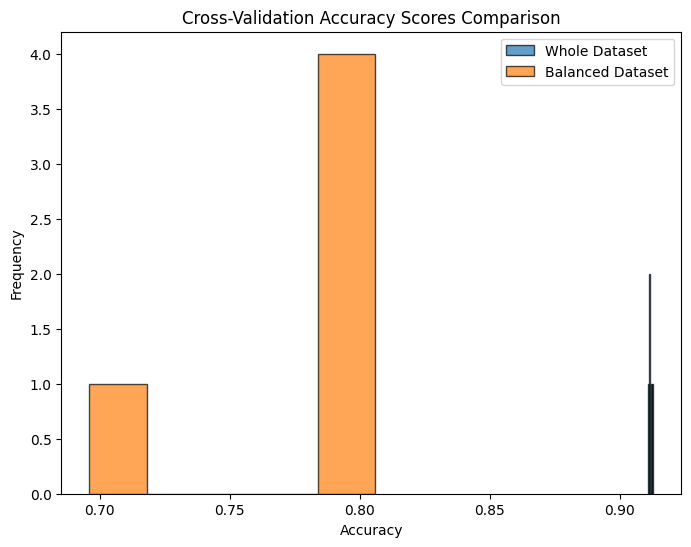

Mean accuracy on whole dataset: 0.9118
Mean accuracy on balanced dataset: 0.7818


In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, edgecolor='black', alpha=0.7, label='Whole Dataset')
plt.hist(cv_scores_balanced, bins=5, edgecolor='black', alpha=0.7, label='Balanced Dataset')
plt.title('Cross-Validation Accuracy Scores Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Mean accuracy on whole dataset: {cv_scores.mean():.4f}")
print(f"Mean accuracy on balanced dataset: {cv_scores_balanced.mean():.4f}")


#*Data Visualization*

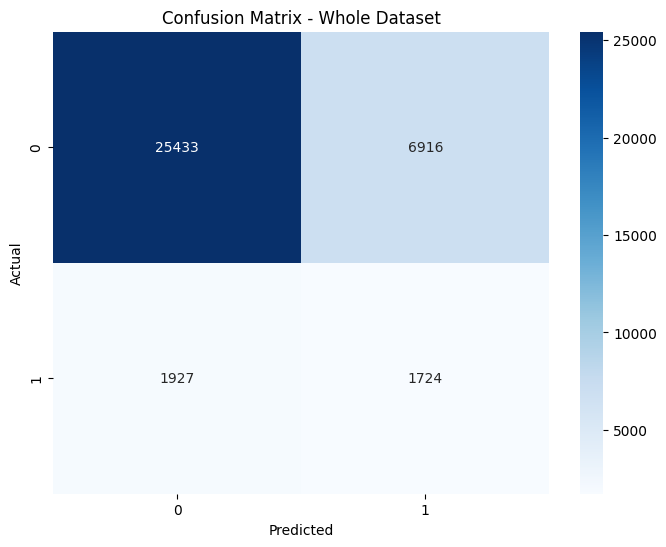

Classification Report - Whole Dataset:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85     32349
           1       0.20      0.47      0.28      3651

    accuracy                           0.75     36000
   macro avg       0.56      0.63      0.57     36000
weighted avg       0.86      0.75      0.79     36000



In [104]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

conf_matrix_whole = confusion_matrix(y_test, y_pred) # Whole dataset confusion matrix

plt.figure(figsize=(8, 6))# Plot Confusion Matrix for the whole dataset
sns.heatmap(conf_matrix_whole, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Whole Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report_whole = classification_report(y_test, y_pred) # Classification Report for the whole dataset

print("Classification Report - Whole Dataset:")
print(class_report_whole)


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


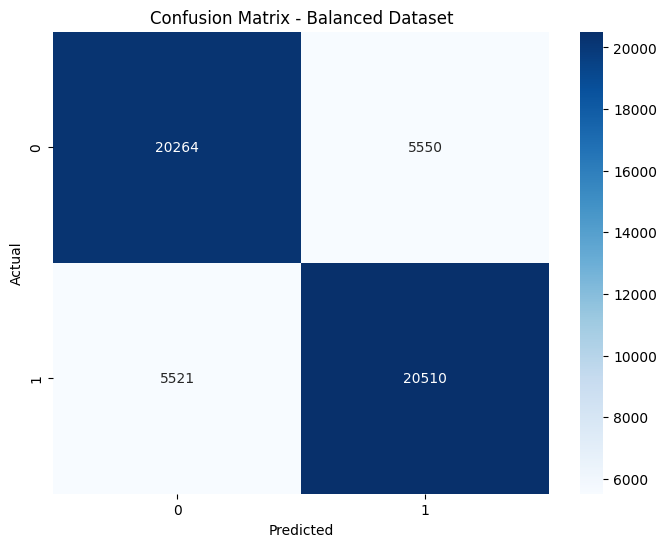

Classification Report - Balanced Dataset:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     25814
           1       0.79      0.79      0.79     26031

    accuracy                           0.79     51845
   macro avg       0.79      0.79      0.79     51845
weighted avg       0.79      0.79      0.79     51845



In [106]:


X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
    )

gnb_balanced = GaussianNB()
gnb_balanced.fit(X_train_balanced, y_train_balanced)


y_pred_balanced = gnb_balanced.predict(X_test_balanced)


conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Balanced Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)
print("Classification Report - Balanced Dataset:")
print(class_report_balanced)


In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:

# Step 1: Split the training data into 50/50
X_train_50, _, y_train_50, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Step 2: Initialize the model
gnb_full = GaussianNB()
gnb_half = GaussianNB()


In [110]:
v_scores_full = cross_val_score(gnb_full, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores (full data): {cv_scores_full}")
print(f"Mean cross-validation accuracy (full data): {cv_scores_full.mean():.4f}")

# Perform cross-validation on the 50/50 split training data
cv_scores_half = cross_val_score(gnb_half, X_train_50, y_train_50, cv=5, scoring='accuracy')
print(f"Cross-validation scores (50/50 split data): {cv_scores_half}")
print(f"Mean cross-validation accuracy (50/50 split data): {cv_scores_half.mean():.4f}")

Cross-validation scores (full data): [0.9121875  0.91131944 0.91159722 0.91090278 0.9128125 ]
Mean cross-validation accuracy (full data): 0.9118
Cross-validation scores (50/50 split data): [0.9125     0.91409722 0.91375    0.91479167 0.91451389]
Mean cross-validation accuracy (50/50 split data): 0.9139


In [111]:
# Step 4: Train the model on the full data and make predictions
gnb_full.fit(X_train, y_train)
y_pred_full = gnb_full.predict(X_test)

# Train the model on the 50/50 split data and make predictions
gnb_half.fit(X_train_50, y_train_50)
y_pred_half = gnb_half.predict(X_test)

In [112]:
# Step 5: Calculate accuracy, confusion matrix, and classification report for both models
accuracy_full = accuracy_score(y_test, y_pred_full)
conf_matrix_full = confusion_matrix(y_test, y_pred_full)
class_report_full = classification_report(y_test, y_pred_full)

# 50/50 split data
accuracy_half = accuracy_score(y_test, y_pred_half)
conf_matrix_half = confusion_matrix(y_test, y_pred_half)
class_report_half = classification_report(y_test, y_pred_half)

# Print out the results
print(f"Accuracy (full data): {accuracy_full:.4f}")
print(f"Classification Report (full data):\n{class_report_full}")
print(f"Confusion Matrix (full data):\n{conf_matrix_full}")

print(f"Accuracy (50/50 split data): {accuracy_half:.4f}")
print(f"Classification Report (50/50 split data):\n{class_report_half}")
print(f"Confusion Matrix (50/50 split data):\n{conf_matrix_half}")

Accuracy (full data): 0.9089
Classification Report (full data):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32349
           1       0.66      0.21      0.32      3651

    accuracy                           0.91     36000
   macro avg       0.79      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000

Confusion Matrix (full data):
[[31940   409]
 [ 2872   779]]
Accuracy (50/50 split data): 0.9090
Classification Report (50/50 split data):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32349
           1       0.66      0.21      0.32      3651

    accuracy                           0.91     36000
   macro avg       0.79      0.60      0.64     36000
weighted avg       0.89      0.91      0.89     36000

Confusion Matrix (50/50 split data):
[[31952   397]
 [ 2880   771]]


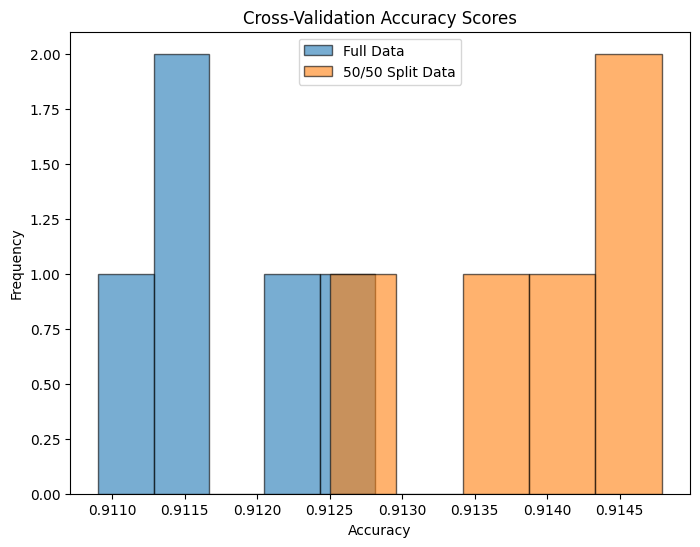

In [113]:
plt.figure(figsize=(8, 6))
plt.hist(cv_scores_full, bins=5, alpha=0.6, label='Full Data', edgecolor='black')
plt.hist(cv_scores_half, bins=5, alpha=0.6, label='50/50 Split Data', edgecolor='black')
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

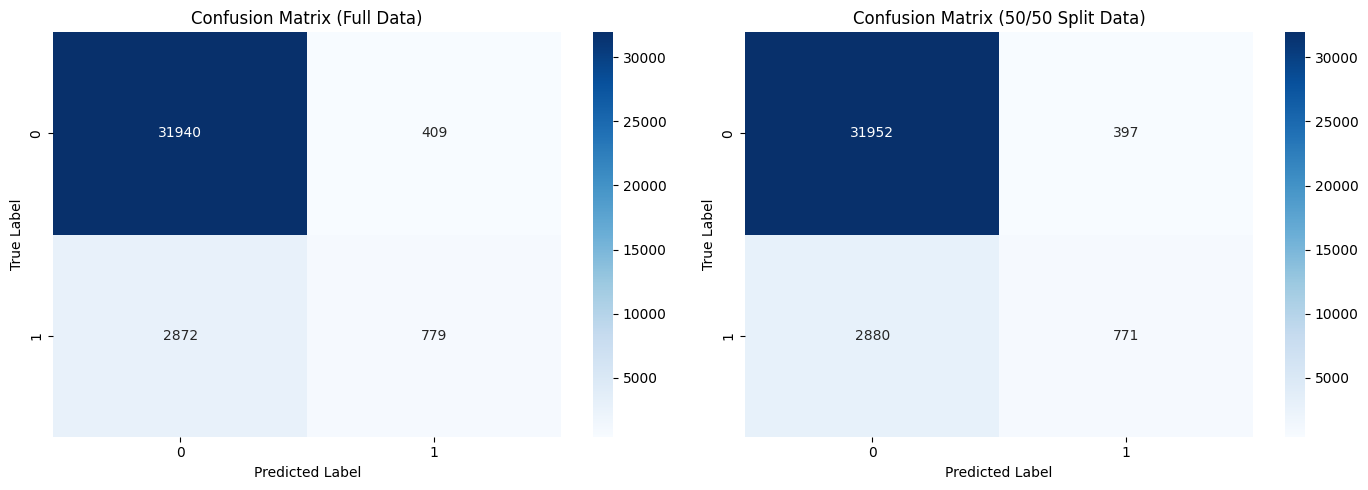

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Full Data)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(conf_matrix_half, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix (50/50 Split Data)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


#Conclusion

The original data had mostly unsuccessful transactions, which made the model predict unsuccessful transactions very well but struggled with successful ones.

We fixed this by balancing the data, so there were equal successful and unsuccessful transactions. After that, the model got better at predicting both types.

Even though the accuracy dropped a little, it was now much better at predicting successful transactions.

In short, balancing the data made the model more accurate for both successful and unsuccessful transactions.

>


